In [3]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
from pprint import pprint
import seaborn as sns
sns.set_style("whitegrid")
import statsmodels.api as sm
from patsy import dmatrices
from __future__ import print_function
from statsmodels.compat import lzip
from math import log 

In [4]:
#upload the required data files 
raw_data = pd.read_csv(r"C:\Users\Shubham Bajaj\Desktop\UDACITY Bike Share Project\forestfires.csv")
raw_data.head(n=10)
    

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [5]:
##############################################PREPROCESSING######################################################################

In [6]:
#change the text input to numerical input 
month_change = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_change = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7 }
numerical_data = raw_data.replace({'month' : month_change, 'day': day_change})
numerical_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [323]:
#normalization of the data #since n=517 the sample mean 
mean_of_data = numerical_data.mean() #calculating mean
centered_data = numerical_data - mean_of_data #difference between mean and data values 
std_of_data = numerical_data.std() #calculating standard deviation 
stdized_data = centered_data/std_of_data #standardizing data 
stdized_data.head(n=10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.007337,0.569309,-1.966538,0.357375,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,-0.201824
1,1.007337,-0.243765,1.109046,-1.089853,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,-0.201824
2,1.007337,-0.243765,1.109046,0.839784,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,-0.201824
3,1.439531,1.382383,-1.966538,0.357375,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,-0.201824
4,1.439531,1.382383,-1.966538,1.322193,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,-0.201824
5,1.439531,1.382383,0.230308,1.322193,0.299871,-0.399278,-0.241629,1.245392,0.570182,-0.936922,0.771577,-0.073197,-0.201824
6,1.439531,1.382383,0.230308,-1.572262,0.299871,-0.343069,-0.210992,-0.114413,0.897394,-1.059490,-0.512154,-0.073197,-0.201824
7,1.439531,1.382383,0.230308,-1.572262,0.154946,0.539103,0.242919,0.368098,-1.875301,2.556266,-1.014483,-0.073197,-0.201824
8,1.439531,1.382383,0.669677,-1.089853,0.064368,0.290846,0.583151,-0.443398,-0.996994,1.146734,0.771577,-0.073197,-0.201824
9,1.007337,0.569309,0.669677,0.839784,0.336102,-0.357121,0.607338,-0.421466,0.673512,-0.262798,-0.009824,-0.073197,-0.201824


In [10]:
stdized_data.describe() #checking accuracy of normalization 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,517.000000
mean,1.247659e-16,2.031472e-16,2.194677e-16,2.594099e-16,4.199606e-14,-2.989227e-16,1.920235e-15,-7.945503e-16,4.346405e-16,1.619165e-16,-4.061870e-16,3.354828e-16,-0.093450
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.312711
min,-1.585825e+00,-1.869913e+00,-2.845277e+00,-1.572262e+00,-1.303319e+01,-1.713948e+00,-2.177000e+00,-1.978662e+00,-2.874160e+00,-1.794899e+00,-2.019142e+00,-7.319742e-02,-0.225427
25%,-7.214373e-01,-2.437649e-01,-2.090616e-01,-1.089853e+00,-8.055651e-02,-6.600260e-01,-4.443977e-01,-5.530598e-01,-5.836726e-01,-6.917863e-01,-7.354113e-01,-7.319742e-02,-0.225427
50%,-2.892437e-01,-2.437649e-01,2.303076e-01,3.573748e-01,1.730616e-01,-4.016365e-02,4.686651e-01,-1.363453e-01,7.075224e-02,-1.402302e-01,-9.824197e-03,-7.319742e-02,-0.215244
75%,1.007337e+00,5.693090e-01,6.696769e-01,8.397841e-01,4.085641e-01,4.922622e-01,6.690148e-01,3.900308e-01,6.735120e-01,5.338940e-01,4.925053e-01,-7.319742e-02,-0.103821
max,1.871724e+00,3.821605e+00,1.987784e+00,1.322193e+00,1.006378e+00,2.817136e+00,1.260389e+00,1.032538e+01,2.481791e+00,3.414243e+00,3.004153e+00,2.155141e+01,2.886738


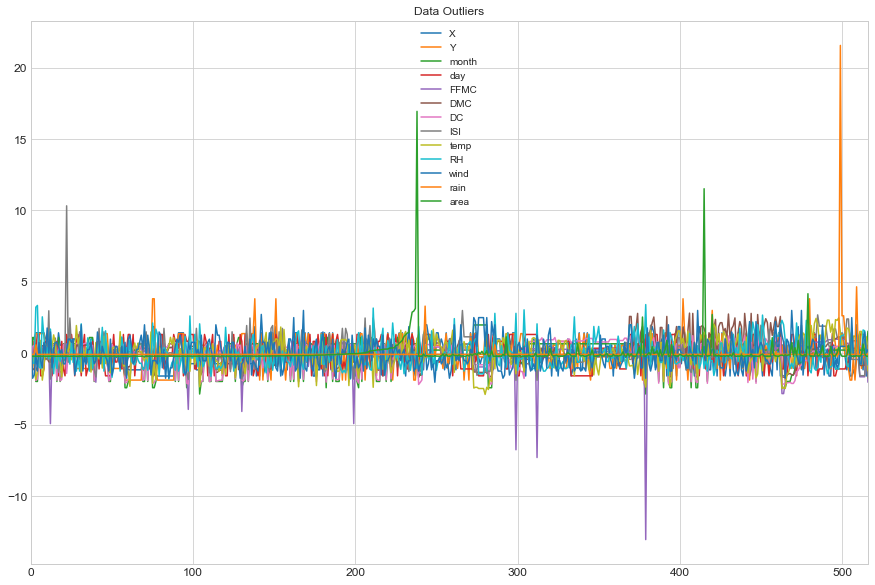

In [257]:
ax = stdized_data[stdized_data.columns].plot(kind='line', title ="Data Outliers", figsize=(15, 10), legend=True, fontsize=12)
plt.show() #visualize parametrs with outliers

In [7]:
############################################### LINEAR REGRESSION ##########################################################

In [104]:
from sklearn.cross_validation import train_test_split # Import function to create training and test set splits
from sklearn.linear_model import LinearRegression     # Import Linear Regression 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [308]:
cols = stdized_data.shape[1]
X = stdized_data.iloc[:, 2:cols-6]
y = stdized_data.iloc[:, cols-1:cols]

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.30, random_state=123)


In [320]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
m = np.array(y).tolist()
n= m[-156:]
y_true = np.asarray(n)
print('RMSE of predictions is {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))) # compute the RMSE of our predictions
print('MSE of prediction is {}'.format(mean_squared_error(y_pred, y_test)))
print('R2 of predictions is {}'.format(r2_score(y_true, y_pred)))

RMSE of predictions is 0.39396551937226415
MSE of prediction is 0.15520883045425785
R2 of predictions is 0.012689992830085983


In [321]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)

(361, 5)
(156, 5)
(361, 1)
(156, 1)
(156, 1)


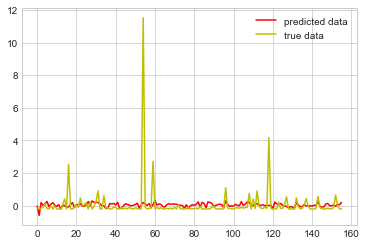

In [322]:
plt.plot(y_pred,'r',label = "predicted data")
plt.plot(y_true, 'y',label = 'true data')
plt.legend()